In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose


# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
date = pd.read_csv("retention_year_customers.csv")
date

,reviewerID,first_order_year,last_order_year,no_of_years
0,A1DEHPRSH4BF2P,1998,2013,15
1,A3GYHXLVWTTDV9,1998,2005,7
2,AXWEQGFMF317A,1998,2001,3
3,A2RROM9KCYOYHJ,1998,2000,2
4,A2MIXSIPW7WKT8,1998,1998,0
...,...,...,...,...
178524,A1WF5U85E3T10G,2018,2018,0
178525,ALGEZHAH9OKXA,2018,2018,0
178526,A303SNZ4AR7TDQ,2018,2018,0
178527,A1LCIBTCBBVMTK,2018,2018,0


In [3]:
happy = pd.read_csv("happy_customers.csv")
happy

,reviewerID,total_price_spent,avg_sentiment,total_order,years,first_order_year,last_order_year
0,A0001528BGUBOEVR6T5U,16.276421,2.0,1,0,2014,2014
1,A00201164H8T5GSBKYFP,194.508243,2.0,15,1,2012,2013
2,A01003458IEUPS8LQ1QU,57.740000,2.0,3,0,2018,2018
3,A0203183BAH3TR08FZGB,40.046579,2.0,4,0,2015,2015
4,A0220159ZRNBTRKLG08H,54.972476,2.0,5,1,2014,2015
...,...,...,...,...,...,...,...
124151,AZZX23UGJGKTT,29.510000,1.8,5,3,2013,2016
124152,AZZXJAE2DILET,70.487408,2.0,6,1,2017,2018
124153,AZZXNUE4RQ6FJ,42.200508,2.0,4,2,2012,2014
124154,AZZY4W8E5AX2K,44.630000,2.0,4,2,2014,2016


In [4]:
yrs = [1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
tot = []
ret = []
retper = []
a = int
b = int
c = int
for i in yrs:
    a = date.reviewerID[(date.first_order_year == i)].count()
    tot.append(a)

    b = date.reviewerID[(date.first_order_year == i) & (date.last_order_year == 2018)].count()
    ret.append(b)
    
    c = round(((b/a) * 100),2)
    retper.append(c)
    
print(ret)
print(tot)
print(retper)
    

[1, 10, 24, 32, 38, 35, 35, 66, 114, 221, 240, 331, 443, 648, 1098, 2666, 3879, 4990, 5156, 3933]
[59, 278, 686, 774, 875, 937, 958, 1589, 2190, 3728, 3841, 4544, 4873, 6589, 11414, 25443, 32638, 35381, 25886, 12489]
[1.69, 3.6, 3.5, 4.13, 4.34, 3.74, 3.65, 4.15, 5.21, 5.93, 6.25, 7.28, 9.09, 9.83, 9.62, 10.48, 11.88, 14.1, 19.92, 31.49]


In [5]:
retention = pd.DataFrame()
retention["year"] = yrs 
retention["No. of new customers"] = tot
retention['No of customers retained'] = ret
retention['Percentage of retention'] = retper
retention

,year,No. of new customers,No of customers retained,Percentage of retention
0,1998,59,1,1.69
1,1999,278,10,3.60
2,2000,686,24,3.50
3,2001,774,32,4.13
4,2002,875,38,4.34
5,2003,937,35,3.74
6,2004,958,35,3.65
7,2005,1589,66,4.15
8,2006,2190,114,5.21
9,2007,3728,221,5.93


In [6]:
retention.set_index('year',inplace = True)
retention

,No. of new customers,No of customers retained,Percentage of retention
year,,,
1998,59,1,1.69
1999,278,10,3.60
2000,686,24,3.50
2001,774,32,4.13
2002,875,38,4.34
2003,937,35,3.74
2004,958,35,3.65
2005,1589,66,4.15
2006,2190,114,5.21


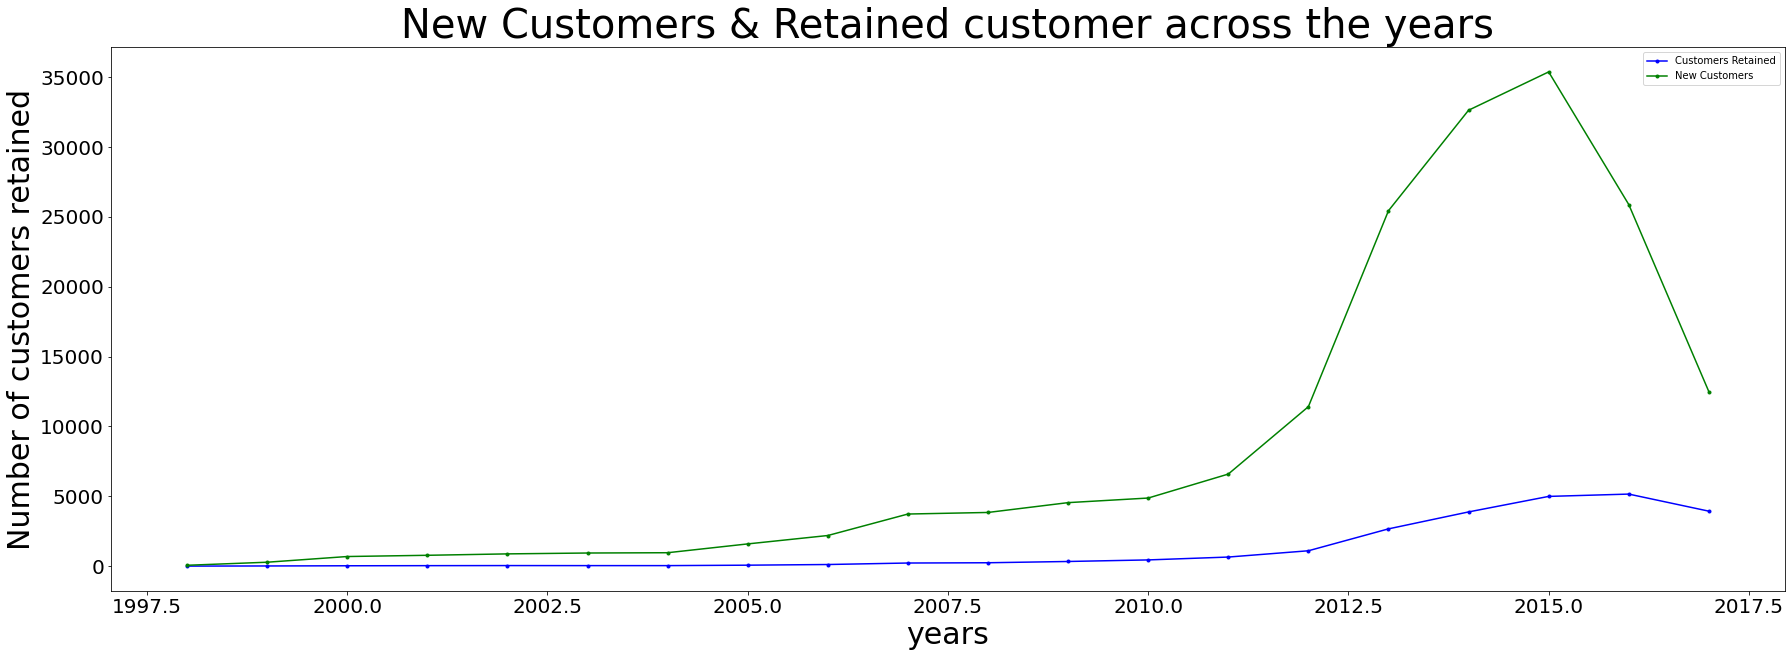

In [7]:
plt.figure(figsize=(30,10))
plt.title("New Customers & Retained customer across the years", size = 40)
plt.plot(retention['No of customers retained'], color = 'b', marker = '.', label = 'Customers Retained')
plt.plot(retention['No. of new customers'], color = 'g', marker = '.', label = 'New Customers')
# plt.plot(retention['Percentage of retention'], color = 'r', marker = '.')

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("years", size = 30)
plt.ylabel("Number of customers retained", size = 30)
plt.legend()
plt.show()


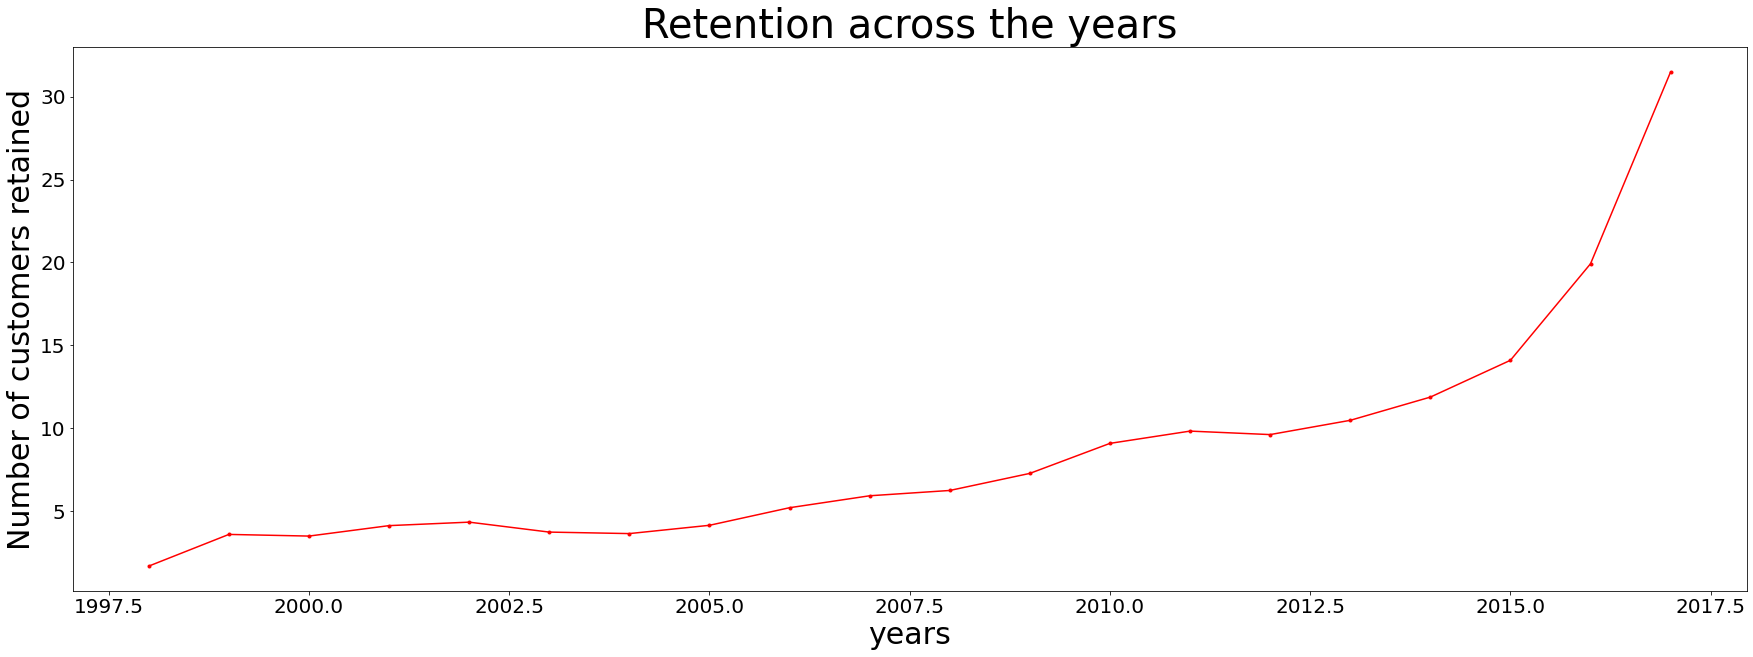

In [8]:
plt.figure(figsize=(30,10))
plt.title("Retention across the years", size = 40)
plt.plot(retention['Percentage of retention'], color = 'r', marker = '.')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("years", size = 30)
plt.ylabel("Number of customers retained", size = 30)
plt.show()


In [9]:
reten = retention['No of customers retained']
reten

year
1998       1
1999      10
2000      24
2001      32
2002      38
2003      35
2004      35
2005      66
2006     114
2007     221
2008     240
2009     331
2010     443
2011     648
2012    1098
2013    2666
2014    3879
2015    4990
2016    5156
2017    3933
Name: No of customers retained, dtype: int64

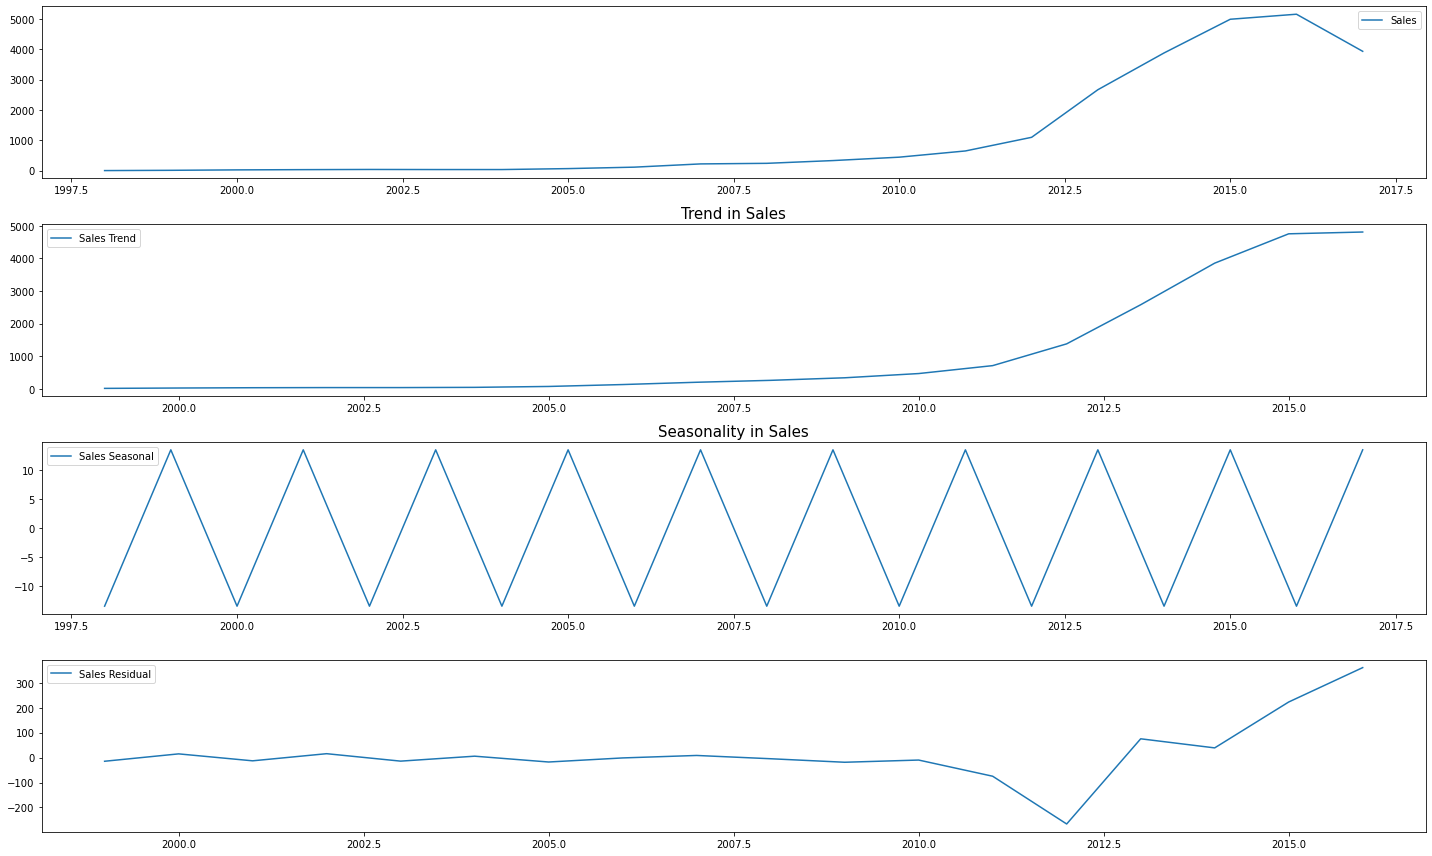

In [10]:
decomposition = seasonal_decompose(reten, period = 2)
decomposition
d_trend = decomposition.trend 
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(reten,label='Sales')
plt.legend(loc='best')

plt.subplot(412)
plt.title("Trend in Sales",size = 15)
plt.plot(d_trend,label='Sales Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.title("Seasonality in Sales",size = 15)
plt.plot(d_seasonal,label='Sales Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Sales Residual')
plt.legend(loc='best')

plt.tight_layout()

In [11]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05:
        ret = "Data is Stationary. Proceed to model building"
    else:
        ret = "Data is not Stationary. Make is stationary"
        
    return(ret)

In [12]:
checkStationarity(reten)

0.9958625827231677


'Data is not Stationary. Make is stationary'

In [13]:
diff_reten= reten - reten.shift(8)

In [14]:
diff_reten.dropna(inplace=True)

In [15]:
checkStationarity(diff_reten)

0.00833548022234775


'Data is Stationary. Proceed to model building'

In [16]:
diff_reten

year
2006     113.0
2007     211.0
2008     216.0
2009     299.0
2010     405.0
2011     613.0
2012    1063.0
2013    2600.0
2014    3765.0
2015    4769.0
2016    4916.0
2017    3602.0
Name: No of customers retained, dtype: float64

In [17]:
fb_acf = acf(diff_reten,nlags=10) 
fb_pacf = pacf(diff_reten,nlags=5)

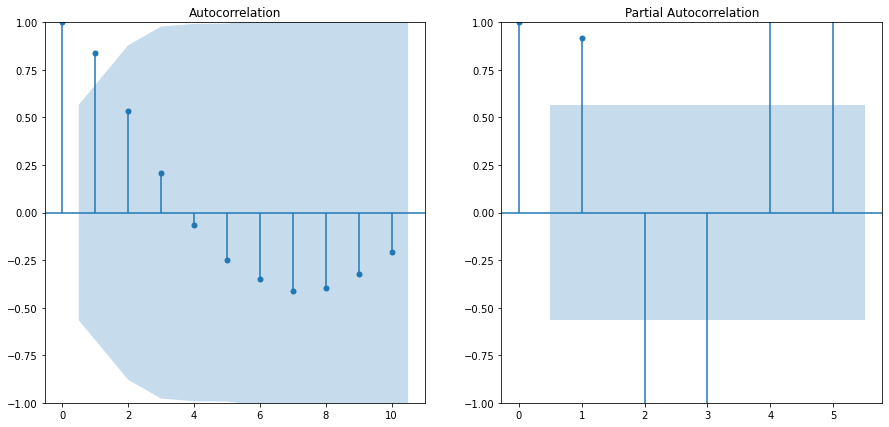

In [18]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(diff_reten,lags = 10 , ax=ax[0]) # for q
plot_pacf(diff_reten,lags = 5,ax=ax[1]) # for p
plt.show()

In [19]:
# q = 1
# p = 5


In [20]:
# split the data into train and test
length = int(0.9 * len(diff_reten))
train1 = diff_reten.iloc[:length]
test1 = diff_reten.iloc[length:]
print("train = {}, test = {}".format(len(train1), len(test1)))

train = 10, test = 2


In [21]:
d=0; #ARMA 
lis=[]
for p in range(6):
    for q in range(2):
        lis.append((p,d,q))

# building model
model=[]
for i in lis:
    m = ARIMA(diff_reten, order=i).fit() # d=0 becomes ARMA
    model.append(m)

# checking model is good or not
c=1
for i in model:
    pvalue = sm.stats.acorr_ljungbox(i.resid, lags=[1], return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print(f'Model {c} Not a good model')
    else:
        print(f'Model {c} Good model')
    c+=1

Model 1 Not a good model
Model 2 Not a good model
Model 3 Good model
Model 4 Good model
Model 5 Good model
Model 6 Good model
Model 7 Good model
Model 8 Good model
Model 9 Good model
Model 10 Good model
Model 11 Good model
Model 12 Good model


In [24]:
# calculating AIC and BIC score   
aic=[]
bic=[]
for i in model[0:]:
    aic.append(i.aic)
    bic.append(i.bic)

# predicting values
forecast=[]
for i in model[0:]:
    fcast = i.predict(start=len(train1), end=len(train1)+len(test1)-1)
    forecast.append(fcast)

# calculating MSE and RMSE score
MSE = []
RMSE = []
for i in forecast:
    mse = mean_squared_error(test1, i)
    rmse = np.sqrt(mse)
    MSE.append(mse)
    RMSE.append(rmse)

# printing model numbers
model_no=[]
for i in range(0,len(model)):
    model_no.append('Model '+str(i))
    
# dataframe of all results
df_results = pd.DataFrame({'Model No.': model_no, '(p, d, q)':lis[0:], 'AIC': aic, 'BIC': bic, 'MSE': MSE, 'RMSE': RMSE})
df_results

,Model No.,"(p, d, q)",AIC,BIC,MSE,RMSE
0,Model 0,"(0, 0, 0)",218.357167,219.326980,6.086533e+06,2467.089986
1,Model 1,"(0, 0, 1)",207.984583,209.439303,9.152733e+05,956.699160
2,Model 2,"(1, 0, 0)",201.072810,202.527530,6.144783e+05,783.886693
3,Model 3,"(1, 0, 1)",196.822235,198.761861,2.280627e+05,477.559108
4,Model 4,"(2, 0, 0)",191.547655,193.487281,1.800580e+05,424.332441
5,Model 5,"(2, 0, 1)",193.460010,195.884544,1.683572e+05,410.313536
6,Model 6,"(3, 0, 0)",193.434296,195.858829,1.657669e+05,407.144760
7,Model 7,"(3, 0, 1)",195.466031,198.375471,1.433993e+05,378.680993
8,Model 8,"(4, 0, 0)",195.434617,198.344057,1.930079e+05,439.326671
9,Model 9,"(4, 0, 1)",198.075372,201.469718,2.321279e+05,481.796514


In [25]:
print('Taking model with lowest RMSE score:')
df_results[df_results.RMSE==df_results.RMSE.min()]


Taking model with lowest RMSE score:


,Model No.,"(p, d, q)",AIC,BIC,MSE,RMSE
11,Model 11,"(5, 0, 1)",199.138998,203.018251,94739.652962,307.798072


In [26]:
p=5;q=0

m1 = ARIMA(train1,order=(p,0,q)).fit()

In [27]:
start = len(train1) 
end = len(train1)+len(test1)-1 

In [28]:
f1 = m1.predict(start,end)
dfres=pd.DataFrame({'actual':test1, 'forecast':f1.values})
dfres

,actual,forecast
year,,
2016,4916.0,4248.288547
2017,3602.0,3443.785304


In [29]:
dfres['error'] = dfres.actual - dfres.forecast
dfres.head()

,actual,forecast,error
year,,,
2016,4916.0,4248.288547,667.711453
2017,3602.0,3443.785304,158.214696


In [30]:

mse1 = mean_squared_error(dfres.actual, dfres.forecast) #on test data
mse1

235435.23719408576

In [31]:
rmse1 = np.sqrt(mse1)
rmse1

485.2166909681547

Text(0.5, 1.0, 'ARMA model')

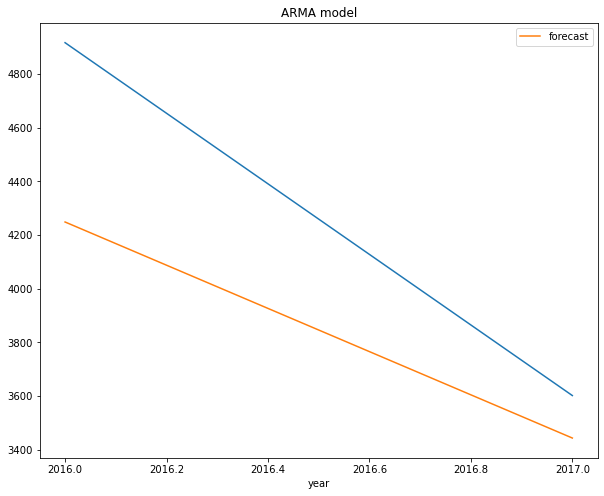

In [32]:
dfres.actual.plot(figsize=(10,8))
dfres.forecast.plot(legend=True)
plt.title("ARMA model")

In [33]:
a = diff_reten.index[-1] + 1
a

2018

In [34]:
n_steps = 3 # number of steps to forecast (3 years with monthly data)
start_index = diff_reten.index[-1]
end_index = start_index + n_steps
future_predictions = m1.predict(start=start_index, end=end_index)
diff_reten1 = diff_reten.append(future_predictions)
diff_reten1

2006     113.000000
2007     211.000000
2008     216.000000
2009     299.000000
2010     405.000000
2011     613.000000
2012    1063.000000
2013    2600.000000
2014    3765.000000
2015    4769.000000
2016    4916.000000
2017    3602.000000
2017    4077.902970
2018    3747.663576
2019    3529.913891
2020    2544.528290
dtype: float64

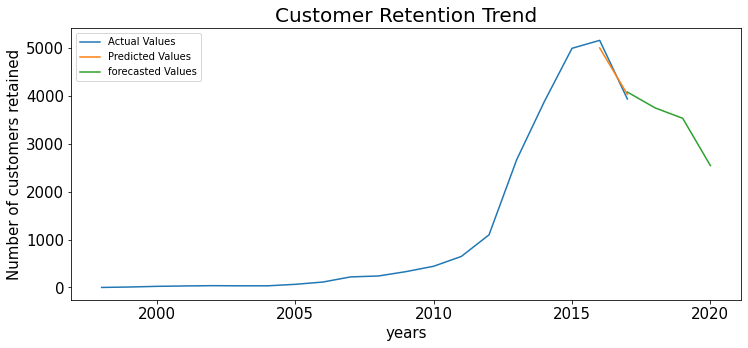

In [35]:
plt.title("Customer Retention Trend", size = 20)
#dfres.forecast.plot(legend=True)
reten.plot(figsize=(12,5),label  = "Actual Values")
#diff_reten1.plot(figsize=(12,5), color = 'b')
fcast.plot(figsize=(12,5),label  = "Predicted Values")
future_predictions.plot(figsize=(12,5),label  = "forecasted Values")
plt.legend()
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("years", size = 15)
plt.ylabel("Number of customers retained", size = 15)
plt.show()

# Conclusion: 
## The number of customers retained for next year will remain fall each year.